In [1]:
# import os
# os.chdir('/home/reggie/cosmo_learn')

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from cosmo_learn.cosmo_learn import *

### One mock

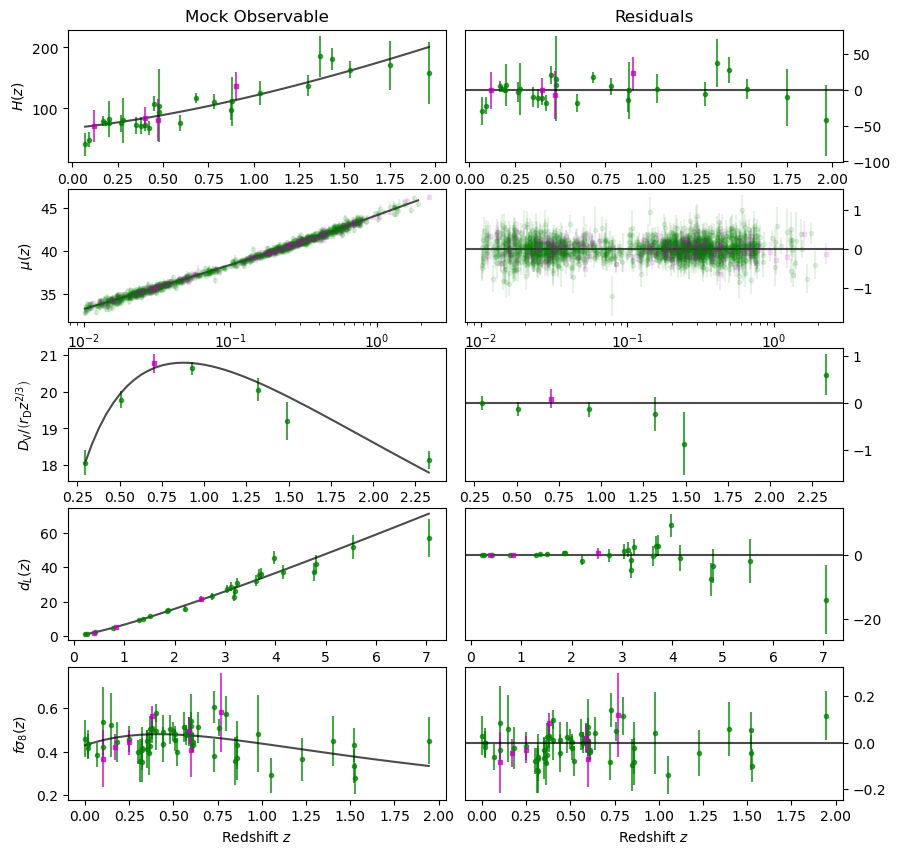

In [3]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, label_train=None, label_test=None)
fig.subplots_adjust(wspace=0.05)
plt.show()

### Multiple mocks, fixed random seed

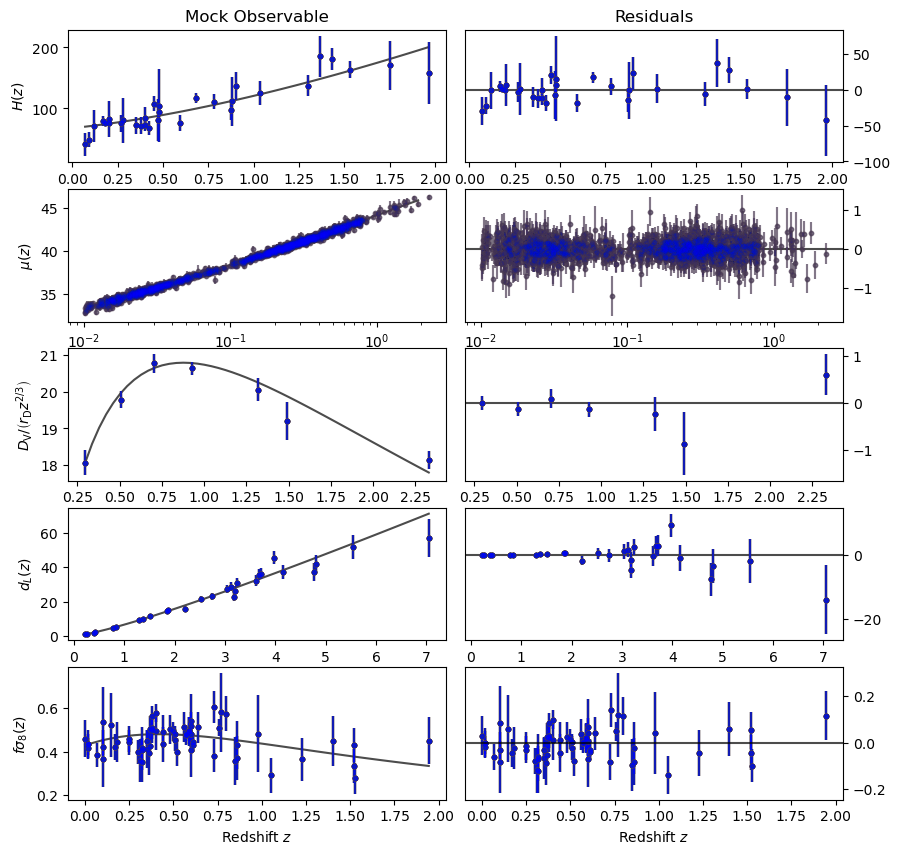

In [4]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with fixed random seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### Multiple mocks, changing random seed

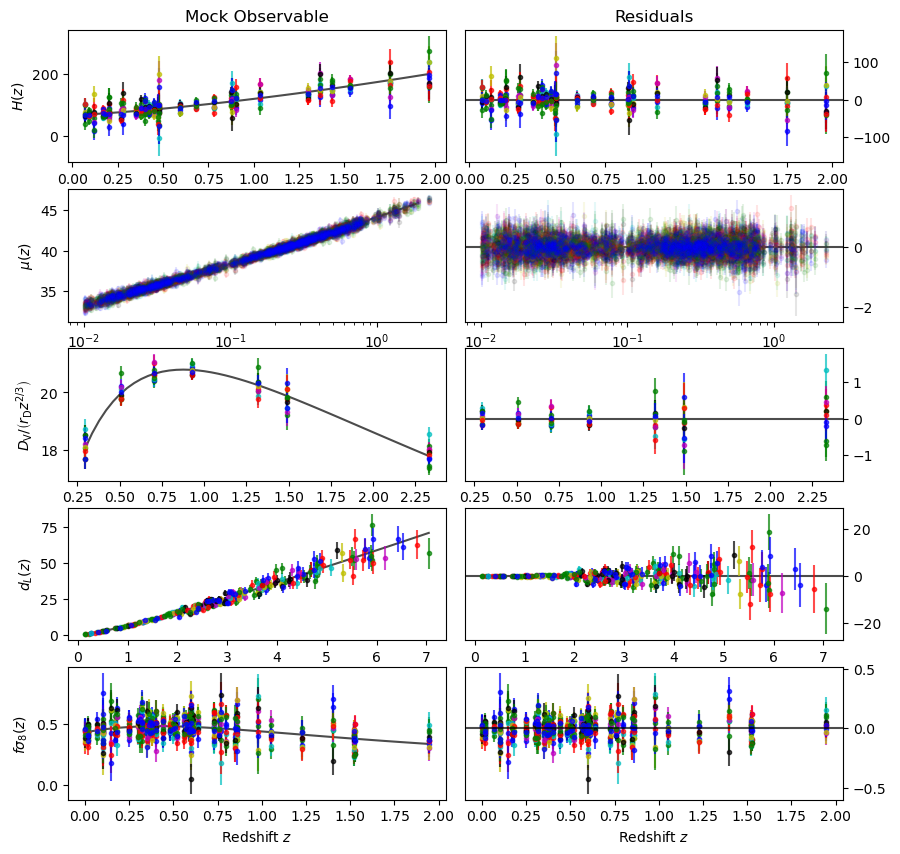

In [5]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

# fig, ax=my_cosmo_learn.show_mocks(show_input=True) # only mocks, no residuals
fig, ax=my_cosmo_learn.show_mocks_and_residuals(show_input=True, fmt_train='go', fmt_test='go')
fig.subplots_adjust(wspace=0.05)

# loop with changing seed
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for rs in range(10):
    my_cosmo_learn_rs=CosmoLearn([H0, Om0, w0, s8], seed=rs)
    my_cosmo_learn_rs.make_mock(mock_keys=mock_keys)
    color = colors[rs % len(colors)]
    my_cosmo_learn_rs.show_mocks_and_residuals(ax=ax, fmt_train=f'{color}o', fmt_test=f'{color}o')
plt.show()

### GP/BRR Reconstruction

In [6]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['CosmicChronometers', 'SuperNovae', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['CosmicChronometers', 'RedshiftSpaceDistorsions']

my_cosmo_learn.make_mock(mock_keys=mock_keys)
my_cosmo_learn.train_gp()
my_cosmo_learn.train_brr()

/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.w

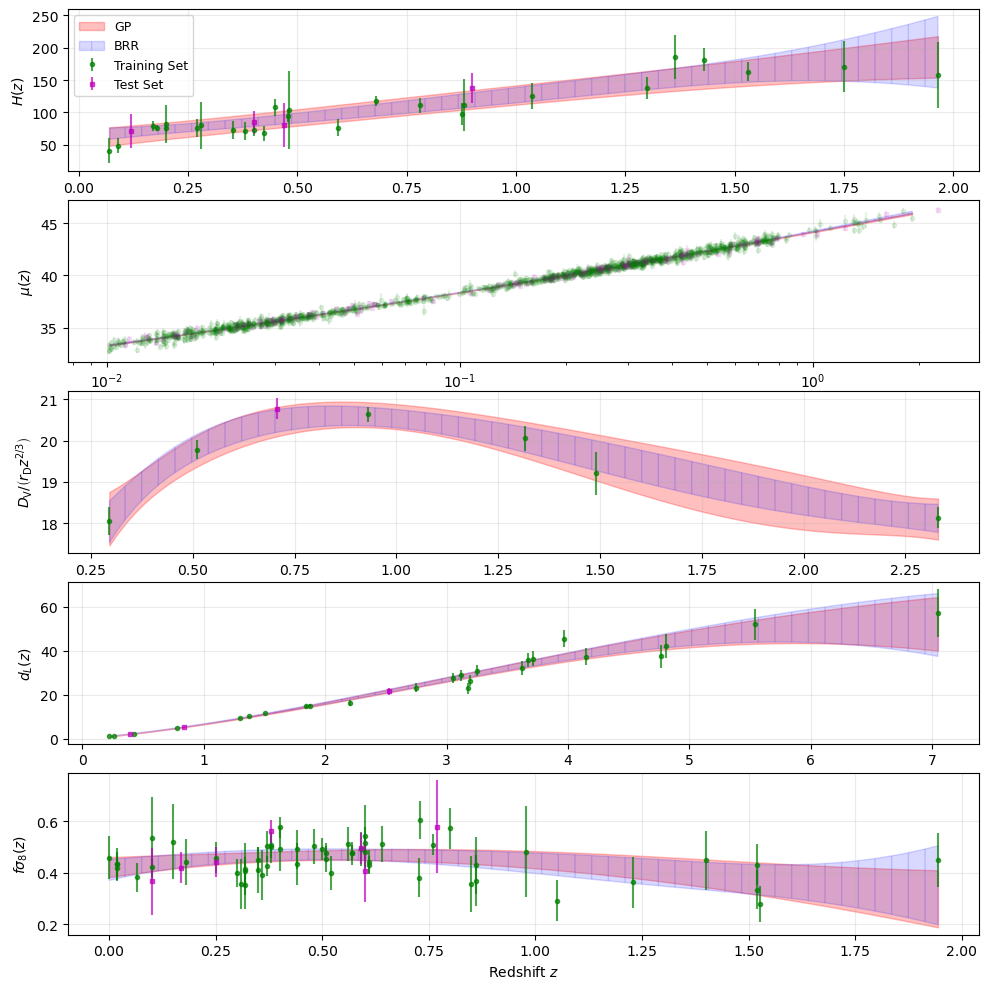

In [7]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_trained_ml(ax=ax, method='GP', label='GP')
my_cosmo_learn.show_trained_ml(ax=ax, method='BRR', color='blue', alpha=0.15, hatch='|', label='BRR')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

### ANN

In [2]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['RedshiftSpaceDistorsions', 'BaryonAcousticOscillations']

my_cosmo_learn.make_mock(mock_keys=mock_keys)
my_cosmo_learn.init_ann(show_summary=True)
my_cosmo_learn.train_ann()

ANN-design for CosmicChronometers
mid node: 4096 hidden layer: 1 hp model: rec_1 n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for SuperNovae
mid node: 4096 hidden layer: 1 hp model: rec_1 n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for BaryonAcousticOscillations
mid node: 4096 hidden layer: 1 hp model: rec_1 n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for BrightSirens
mid node: 4096 hidden layer: 1 hp model: rec_1 n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN-design for RedshiftSpaceDistorsions
mid node: 4096 hidden layer: 1 hp model: rec_1 n_epochs: 30000 learning rate: 0.1 minimum learning rate: 1e-08 max batch size: 300

ANN training w/ CosmicChronometers data completed in 17.56 seconds
ANN training w/ SuperNovae data completed in 65.59 seconds
ANN training w/ BaryonAcousticOscillations d

/Users/rechbe/Documents/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:1059: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].set_xlim(1, n_epochs); ax[i].legend(loc='lower left', prop={'size': 10})


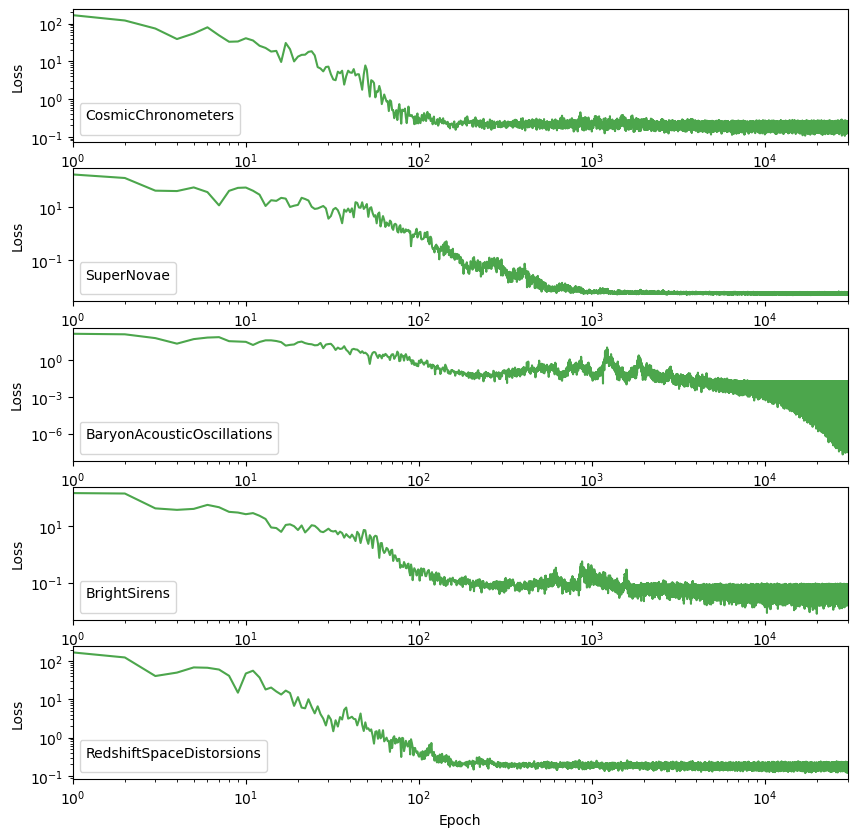

In [3]:
my_cosmo_learn.show_ann_loss();

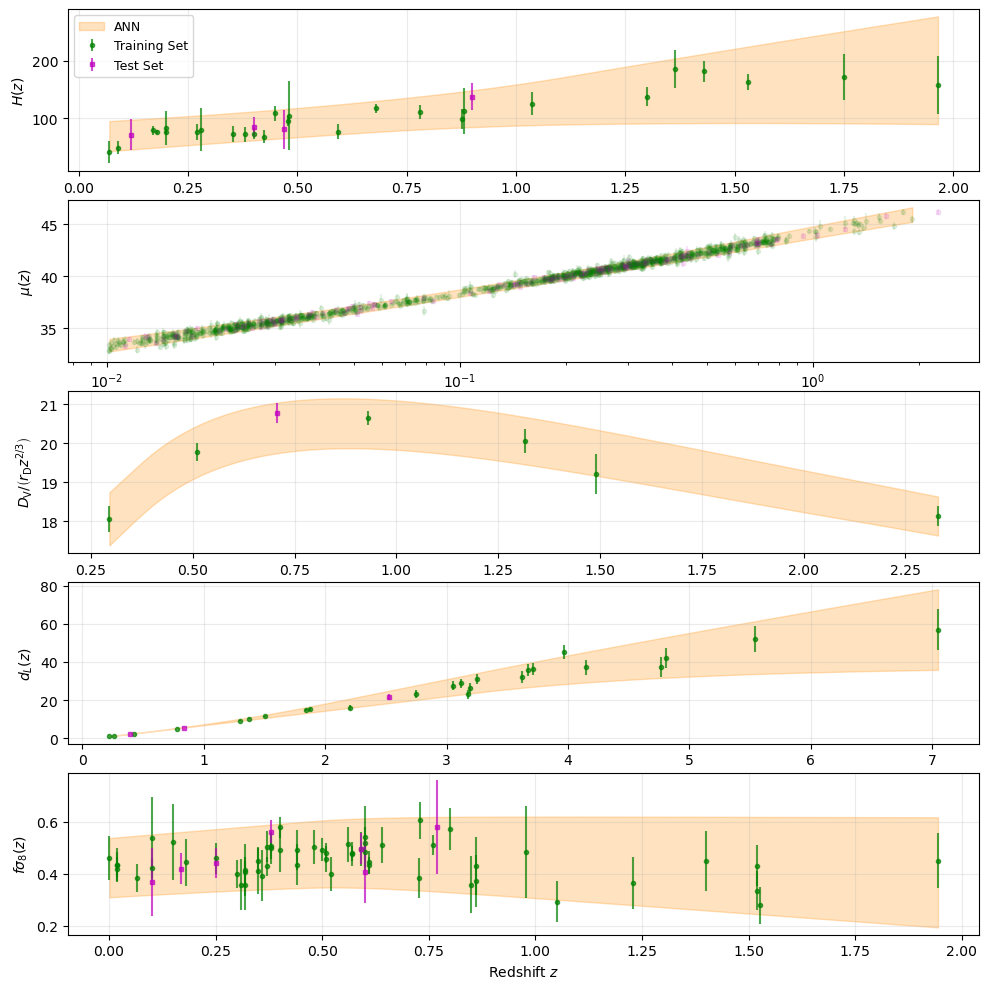

In [4]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_trained_ml(ax=ax, method='ANN', label='ANN', \
                               color='darkorange', alpha=0.25)

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

In [11]:
# ann_arch={}
# for key in my_cosmo_learn.mock_data.keys():
#     if key == 'CosmicChronometers' or key =='RedshiftSpaceDistorsions' \
#         or key == 'BaryonAcousticOscillations':
#         ann = rf.ANN(data, mid_node=4096, hidden_layer=1, hp_model='rec_1')
#         # ann=tf.keras.Sequential([Dense(32, activation='relu', input_shape=[1], \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), \
#         #                             Dense(64, activation='relu', \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), Dense(2),])
#         # ann.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
#         ann_arch[key]=ann
#     if key == 'BrightSirens':
#         # ann=tf.keras.Sequential([Dense(128, activation='relu', input_shape=[1], \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), \
#         #                             Dense(128, activation='relu', \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), Dense(2),])
#         # ann.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
#         ann_arch[key]=ann
#     if key == 'SuperNovae':
#         # ann=tf.keras.Sequential([Dense(256, activation='relu', input_shape=[1], \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), \
#         #                             Dense(512, activation='relu', \
#         #                                 kernel_regularizer=tf.keras.regularizers.l2()), \
#         #                             Dropout(0.1), Dense(2),])
#         # ann.compile(optimizer=Adam(learning_rate=0.00015), loss=tf.keras.losses.MeanSquaredError())
#         ann_arch[key]=ann


# # def train_ann(self, use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000):
# # use_early_stop=True, epochs=10000, validation_split=0.1, verbose=0, patience=1000



In [12]:
# # s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# # H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# # desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
# H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

# my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
# # mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
# #            'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['CosmicChronometers', 'SuperNovae', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']

# my_cosmo_learn.make_mock(mock_keys=mock_keys)
# my_cosmo_learn.init_ann()
# my_cosmo_learn.train_ann(verbose=0)
# my_cosmo_learn.show_ann_loss()
# plt.show()

In [13]:
# fig, ax=my_cosmo_learn.show_mocks(show_input=False)
# my_cosmo_learn.show_trained_ml(ax=ax, method='ANN', color='darkgreen', alpha=0.15, hatch='x', label='ANN')

# [ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
# ax[0].legend(loc='upper left', prop={'size': 9})
# fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
# plt.show()

### MCMC and GA-Fisher

In [14]:
# s8=0.834+/-0.016 (Planck); s8=0.745+/-0.039 (KiDS-450); see https://arxiv.org/abs/2008.11285
# H0, Om0, w0, s8 = 70, 0.3, -1, 0.8

# desi1 Flat wCDM https://arxiv.org/pdf/2404.03002 + planck s8
H0, Om0, w0, s8 = 67.74, 0.3095, -0.997, 0.834

my_cosmo_learn=CosmoLearn([H0, Om0, w0, s8], seed=14000605)
mock_keys=['CosmicChronometers', 'SuperNovae', 'BaryonAcousticOscillations', \
           'BrightSirens', 'RedshiftSpaceDistorsions']
# mock_keys=['CosmicChronometers', 'SuperNovae', \
#            'BrightSirens', 'RedshiftSpaceDistorsions']
my_cosmo_learn.make_mock(mock_keys=mock_keys)

In [15]:
prior_dict={'H0_min': 0, 'H0_max': 100, 'Om0_min': 0, 'Om0_max': 1, \
            'w0_min': -10, 'w0_max': 10, 's8_min': 0.2, 's8_max': 1.5}
rd_fid_prior={'mu': 147.46, 'sigma': 0.28}
llprob=lambda x: my_cosmo_learn.llprob_wcdm(x, prior_dict=prior_dict, rd_fid_prior=rd_fid_prior)

p0=[70, 0.3, -1, 0.8, 147]
nwalkers=15; dres=[0.05, 0.005, 0.01, 0.01, 0.005]; nburn=100; nmcmc=2000
my_cosmo_learn.get_mcmc_samples(nwalkers, dres, llprob, p0, nburn=nburn, nmcmc=nmcmc);

Optimizing initial position...
... At [ 67.99470352   0.31697949  -1.06258809   0.8152854  147.57942575]
Running MCMC...


100%|██████████| 2000/2000 [00:43<00:00, 46.39it/s]

Done.
Mean acceptance fraction: 0.5535333333333334
Total time: 45.06414771080017
MCMC result:
    x[0] = 67.9832545176191 + 0.28974221900101327 - 0.29782323964462876
    x[1] = 0.31858795191114553 + 0.01254413341218047 - 0.013731892021706604
    x[2] = -1.0644058922870672 + 0.06079805515579695 - 0.06313048833675938
    x[3] = 0.8179208633798344 + 0.015810838282512507 - 0.016007918382920594
    x[4] = 147.58673598362512 + 0.2579019810993657 - 0.2739127116149973


In [16]:
fitness_func=lambda x: -2*llprob(x)
prior_ga=[[prior_dict['H0_min'], prior_dict['H0_max']], [prior_dict['Om0_min'], prior_dict['Om0_max']], \
          [prior_dict['w0_min'], prior_dict['w0_max']], [prior_dict['s8_min'], prior_dict['s8_max']], \
          [rd_fid_prior['mu']-20*rd_fid_prior['sigma'], rd_fid_prior['mu']+20*rd_fid_prior['sigma']]]

# change ga hyperparameters via my_cosmo_learn.ga_params[key]=new_values
# some defaults: 'max_num_iteration'=1000, 'population_size'=100, 'mutation_probability'=0.3
my_cosmo_learn.get_gaFisher_samples(fitness_func, prior_ga, \
                                    llprob=llprob, nsamples=(nmcmc-nburn)*nwalkers);

||||||||||||||||__________________________________ 31.9% GA is running...

/home/rbernardo/miniconda3/envs/cosmo_learn_x/lib/python3.10/site-packages/geneticalgorithm/geneticalgorithm.py:353: RuntimeWarning: invalid value encountered in subtract
  normobj=maxnorm-normobj+1


|||||||||||||||||||||||||||||||||||||||||||||||___ 93.7% GA is running...

/home/rbernardo/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:201: RuntimeWarning: divide by zero encountered in divide
  hypergeom_factor=hyp2f1(alpha+1, beta+1, gamma+1, 1 - (1/Omz))/hyp2f1(alpha, beta, gamma, 1 - (1/Omz))
/home/rbernardo/repos/cosmo_learn/cosmo_learn/cosmo_learn.py:214: RuntimeWarning: invalid value encountered in multiply
  return fz*s8z


 The best solution found:                                                                           
 [ 68.52140031   0.34174053  -1.24200037   0.80792652 147.54022501]

 Objective function:
 1515.787534396967

GA-Fisher result:
    x[0] = 68.52348773017238 + 0.3219680585339546 - 0.3184209117601853
    x[1] = 0.3420486326197901 + 0.013220574183182565 - 0.013276704271944051
    x[2] = -1.2436093402130513 + 0.08311578976873646 - 0.08250789135475389
    x[3] = 0.8080141212053303 + 0.015134704821966771 - 0.01519158049000302
    x[4] = 147.53710438770503 + 0.27148341890477923 - 0.2690941637506512


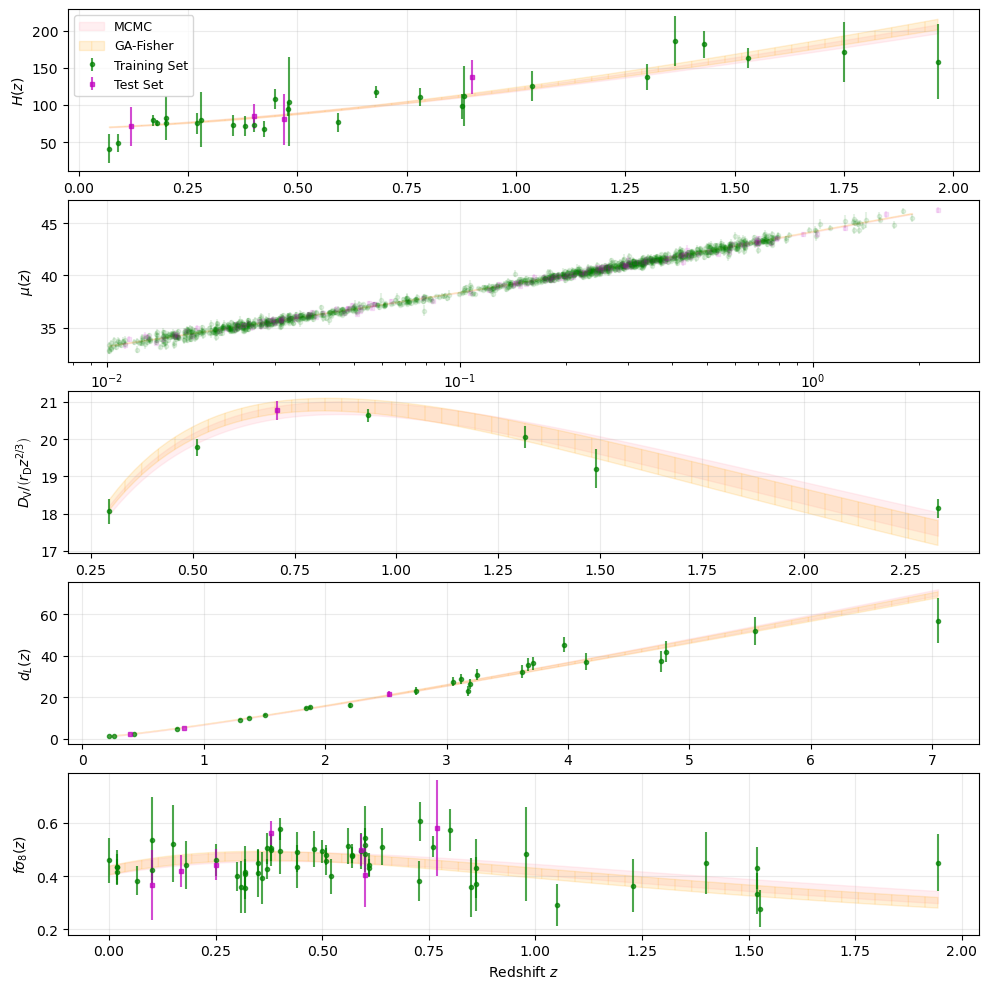

In [17]:
fig, ax=my_cosmo_learn.show_mocks(show_input=False)
my_cosmo_learn.show_bestfit_curve(ax=ax, method='MCMC', label='MCMC', color='pink')
my_cosmo_learn.show_bestfit_curve(ax=ax, method='GAFisher', color='orange', alpha=0.15, hatch='|', label='GA-Fisher')

[ax[i].grid(True, alpha=0.25) for i in range(len(my_cosmo_learn.mock_data.keys()))]
ax[0].legend(loc='upper left', prop={'size': 9})
fig.tight_layout(); fig.subplots_adjust(hspace=0.18)
plt.show()

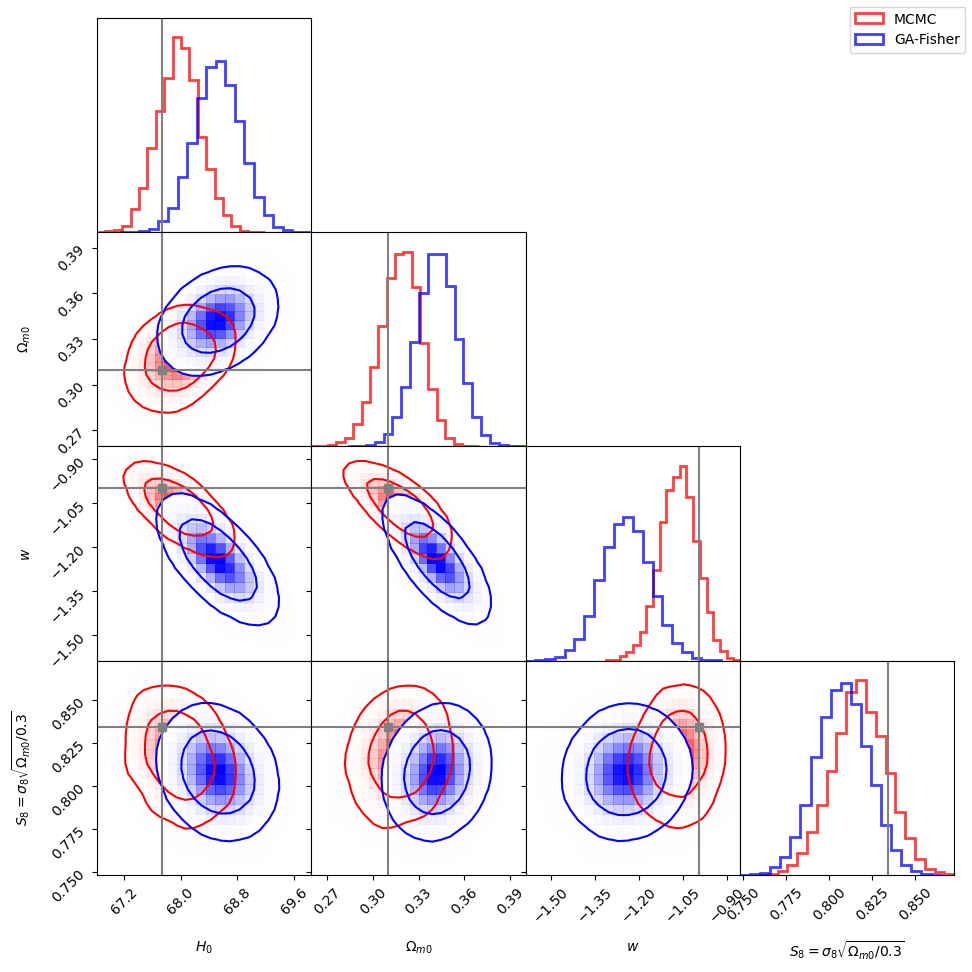

In [18]:
corner_plot = my_cosmo_learn.show_param_posterior(method='MCMC')
my_cosmo_learn.show_param_posterior(method='GAFisher', fig=corner_plot, color='blue', show_truth=True)

corner_plot.legend(['MCMC', 'GA-Fisher'], loc='upper right')
corner_plot.tight_layout(); corner_plot.subplots_adjust(hspace=0, wspace=0)
plt.show()